In [264]:
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import timedelta, datetime
from math import cos, sin, acos, radians

In [265]:
'''
Gets Pandas Dataframe of gas stations with the longetude, latitude and station number as index
'''
def drawMap(stations):
    # Download map data from here http://biogeo.ucdavis.edu/data/gadm2.8/shp/DEU_adm_shp.zip
    # Read map data 
    fname = 'maps/DEU_adm1.shp'
    adm1_shapes = list(shpreader.Reader(fname).geometries())

    # Create figure 
    fig = plt.figure(figsize=(20, 30))
    ax = plt.axes(projection=ccrs.PlateCarree())

    plt.title('Germany')
    ax.coastlines(resolution='10m')

    ax.add_geometries(adm1_shapes, ccrs.PlateCarree(),
                      edgecolor='gray', facecolor='lightgray', alpha=0.5)

    ax.set_extent([4, 16, 47, 56], ccrs.PlateCarree())
    
    # Draw Gas Stations 
    for index, row in stations.iterrows():
        ax.plot(row["Longitude"], row["Latitude"], 'bo', markersize=3, transform=ccrs.Geodetic())
        ax.text(row["Longitude"], row["Latitude"], str(index), color="blue", fontsize=15)

    plt.show()
    
    
def readGasStations(numbers):
    stations = pd.read_csv('../InformatiCup2018/Eingabedaten/Tankstellen.csv', sep=';', index_col=0,
                          names=["Name", "Provider", "Streetname", "Housenumber", "Zipcode", "City", "Latitude", "Longitude"])
    
    return stations.iloc[numbers, -2:]

In [266]:
def read_mse():
    return pd.read_json('data/gas_station_mse.json', orient='records', lines=True)

In [292]:
gas_station_mse = read_mse().sort_values(by=['mse'])
gas_station_mse.set_index('gasstation', inplace=True)
gas_station_numbers = gas_station_mse[gas_station_mse.mse > 0].head(300).index.values

In [293]:
possible_gas_stations = readGasStations(gas_station_numbers)

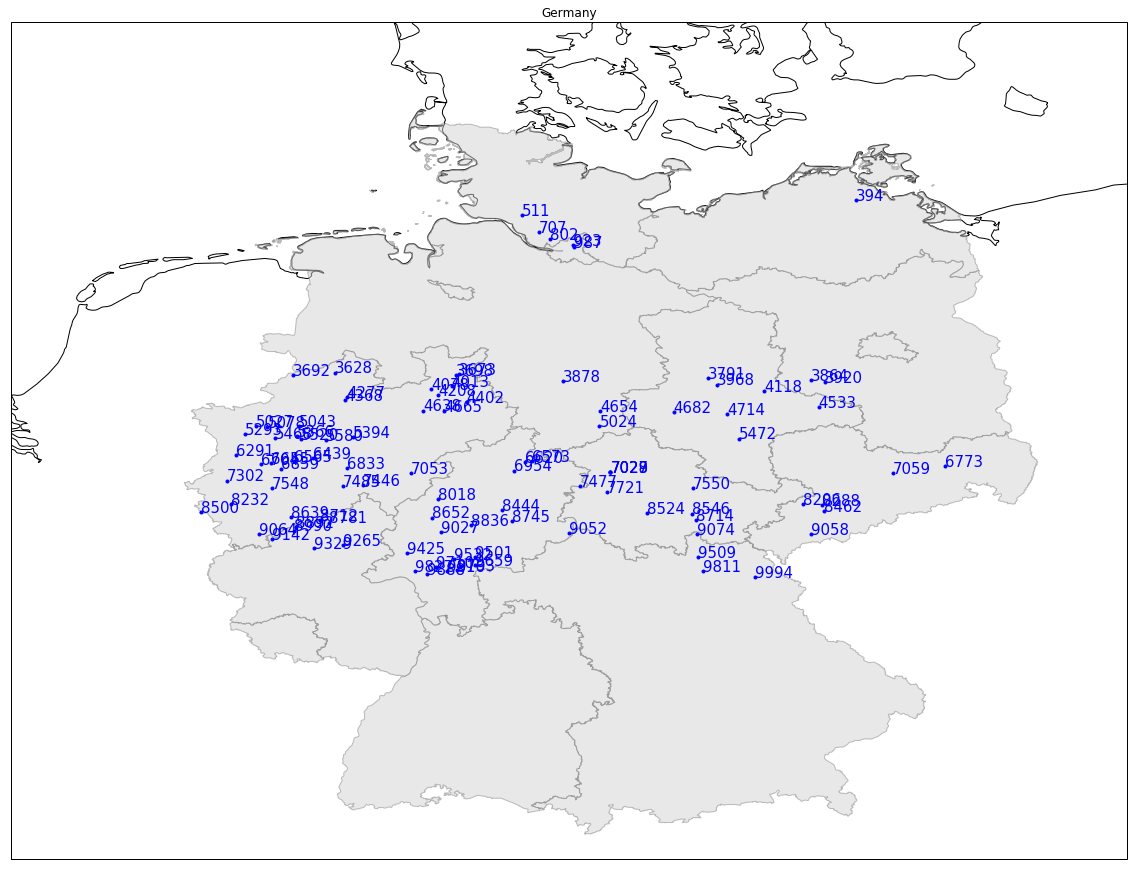

In [269]:
drawMap(possible_gas_stations)

In [270]:
def plotingRoute(stations): 
    # Download map data from here http://biogeo.ucdavis.edu/data/gadm2.8/shp/DEU_adm_shp.zip
    # Read map data 
    fname = 'maps/DEU_adm1.shp'
    adm1_shapes = list(shpreader.Reader(fname).geometries())

    # Create figure 
    fig = plt.figure(figsize=(20, 30))
    ax = plt.axes(projection=ccrs.PlateCarree())

    plt.title('Germany')
    ax.coastlines(resolution='10m')

    ax.add_geometries(adm1_shapes, ccrs.PlateCarree(),
                      edgecolor='gray', facecolor='lightgray', alpha=0.5)

    ax.set_extent([4, 16, 47, 56], ccrs.PlateCarree())
    
    # Draw Gas Stations 
    first = True
    old_long, old_lat = 1, 1
    for index, row in stations.iterrows():
        if first:
            first = False
        else: 
            plt.plot([row["Longitude"], old_long],[row["Latitude"], old_lat],
                color='blue', linewidth=2, marker='o',
                transform=ccrs.Geodetic(),
                )
        ax.text(row["Longitude"], row["Latitude"], str(index), color="black", fontsize=15)
        old_lat, old_long = row["Latitude"], row["Longitude"]

    plt.show()

In [272]:
def split_data(data, number_of_routes=10): 
    samples = []
    route_length = int(len(data)/number_of_routes)
    for i in range(number_of_routes):
        samples.append(data.sample(route_length, random_state = 10))
        data.drop(samples[i].index, inplace=True)
    return samples

def get_dist(a_lat, a_long, b_lat, b_long):
    #a_lat, a_long, b_lat, b_long = np.radians([a_lat, a_long, b_lat, b_long])
    return (6378.388 * acos((sin(a_lat) * sin(b_lat)) + ((cos(a_lat) * cos(b_lat)) * cos(b_long - a_long))))/100

def distance_between_stations(station_a, station_b): 
    return get_dist(station_a["Latitude"], station_a["Longitude"], station_b["Latitude"], station_b["Longitude"])

def find_close_gaststation(data, starting_station, number_of_stations): 
    route = pd.DataFrame()
    return route

def split_data_in_range(data, numer_of_routes = 10, number_of_stations = 20):
    samples
    for i in range(number_of_routes):
        print(i)
    return samples

In [294]:
samples = split_data(possible_gas_stations)

In [295]:
samples[2]

,Latitude,Longitude
6585,51.281587,8.658713
6654,51.261143,12.704145
8919,50.561793,9.644408
4287,51.958717,6.997592
7302,51.072427,6.326151
9711,50.141871,11.054242
8444,50.751505,9.285781
8781,50.620808,7.427844
5190,51.602400,7.523140
8224,50.818268,13.100932


In [275]:
def plot_all_routes(samples=samples): 
    for i in range(len(samples)):
        route = samples[i].sort_values(by=['Longitude', 'Latitude'])
        plotingRoute(route)

In [ ]:
plot_all_routes(samples)

In [296]:
def time_for_routes(starting_time, starting_fuel = 3, speed=50, route_samples=samples): 
    # inital variables
    old_long, old_lat, long, lat = 0, 0, 0, 0
    output_strings = []
    # For each route in list build output
    for sample_number in route_samples: 
        first = True
        current_time = starting_time
        route_times = str(starting_fuel) + "\n"
        for index, station in sample_number.iterrows():
            long = station[1]
            lat = station[0]
            if first:
                first = False
                route_times += str(current_time) + "; " + str(index) + "\n"
            else: 
                dist = get_dist(lat, long, old_lat, old_long)
                time_for_dist_in_hour = timedelta(hours = dist/50)
                current_time = current_time + time_for_dist_in_hour
                route_times += str(current_time).split(".")[0] + "; " + str(index) + "\n"
            old_long = long
            old_lat = lat
        output_strings.append(route_times)
    return output_strings

In [297]:
test = time_for_routes(datetime(2017, 9, 20, 12), route_samples=samples)

In [298]:
len(test)

10

In [299]:
test[9]

'3\n2017-09-20 12:00:00; 4030\n2017-09-20 12:24:27; 3878\n2017-09-20 13:30:10; 6620\n2017-09-20 15:42:21; 394\n2017-09-20 19:06:37; 8206\n2017-09-20 21:18:51; 91\n2017-09-21 00:51:19; 4298\n2017-09-21 01:58:43; 7490\n2017-09-21 03:35:04; 8954\n2017-09-21 05:53:17; 7550\n2017-09-21 06:47:35; 8817\n2017-09-21 09:18:55; 9002\n2017-09-21 09:33:26; 9322\n2017-09-21 11:08:19; 5366\n2017-09-21 12:31:01; 8445\n2017-09-21 14:04:04; 8783\n2017-09-21 16:23:47; 6775\n2017-09-21 17:14:41; 4759\n2017-09-21 19:44:05; 613\n2017-09-21 22:14:11; 5548\n2017-09-21 23:42:49; 8895\n2017-09-22 02:43:40; 9558\n2017-09-22 04:38:03; 4277\n2017-09-22 06:34:37; 9144\n2017-09-22 08:14:19; 9225\n2017-09-22 10:00:34; 4887\n2017-09-22 12:00:35; 9509\n2017-09-22 12:34:56; 9176\n2017-09-22 14:11:56; 3628\n2017-09-22 15:30:17; 6833\n'

In [300]:
def write_to_file(input): 
    for route in input: 
        print(str(route))
        with open('workfile' + "_" + str(input.index(route)) + ".csv", "w") as f:
            f.write(str(route))

In [301]:
write_to_file(test)

3
2017-09-20 12:00:00; 7446
2017-09-20 12:33:16; 6439
2017-09-20 12:48:57; 6729
2017-09-20 13:38:02; 8611
2017-09-20 14:27:03; 8932
2017-09-20 17:32:04; 631
2017-09-20 19:51:16; 923
2017-09-20 20:10:32; 802
2017-09-20 21:17:47; 9173
2017-09-21 00:56:31; 597
2017-09-21 04:12:09; 6979
2017-09-21 05:46:37; 6954
2017-09-21 06:58:40; 5403
2017-09-21 07:32:58; 6975
2017-09-21 07:57:36; 6023
2017-09-21 08:29:33; 4638
2017-09-21 09:24:31; 7202
2017-09-21 10:01:51; 8737
2017-09-21 12:52:07; 8940
2017-09-21 13:24:27; 9593
2017-09-21 17:04:41; 987
2017-09-21 19:14:09; 3871
2017-09-21 19:20:16; 3893
2017-09-21 19:31:59; 4208
2017-09-21 21:16:47; 8796
2017-09-22 00:00:55; 8462
2017-09-22 00:17:06; 8975
2017-09-22 01:56:59; 9081
2017-09-22 03:44:51; 7214
2017-09-22 06:22:01; 9430

3
2017-09-20 12:00:00; 9028
2017-09-20 13:23:27; 9395
2017-09-20 15:17:58; 8950
2017-09-20 16:59:40; 9643
2017-09-20 18:51:07; 5123
2017-09-20 19:27:05; 6704
2017-09-20 20:00:10; 5055
2017-09-20 21:48:33; 9492
2017-09-20 2